# Logistic Regression-Diabetes

# 1. import lib.

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 2.Problem Statements.

In [ ]:
Prediction Count Of  Diabetes Patient.

In [ ]:
IV(IF):-
    'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'
        
DV(DF):- 'Outcome'       

# 3. Data Gathering.

In [2]:
df = pd.read_csv(r"F:\VELOCITY\PROJECTS\Diabetes_DataSet_logisticR\project_app\diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


# 4. EDA Part.

In [5]:
# Outcome

In [7]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

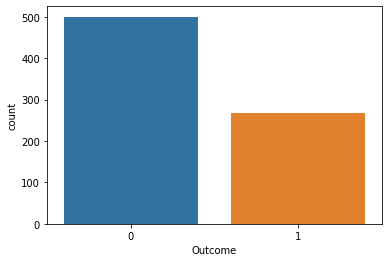

In [8]:
sns.countplot(x = df['Outcome'])

# 5. Feature Selection

In [9]:
df = df.select_dtypes(exclude=object)
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [10]:
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,50,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,52
3,150,66,23,94,28.1,0.167,21
4,150,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [11]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# 6. model training

### Train Test Split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=29,stratify=y)
x_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
617,68,62,13,15,20.1,0.257,23
732,174,88,37,120,44.5,0.646,24
554,84,64,23,115,36.9,0.471,28
584,124,76,24,600,28.7,0.687,52
392,131,64,14,415,23.7,0.389,21
...,...,...,...,...,...,...,...
231,134,80,37,370,46.2,0.238,46
282,133,88,15,155,32.4,0.262,37
118,97,60,23,0,28.2,0.443,22
28,145,82,19,110,22.2,0.245,57


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=29,stratify=y)
y_train

617    0
732    1
554    0
584    1
392    0
      ..
231    1
282    0
118    0
28     0
217    0
Name: Outcome, Length: 576, dtype: int64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=29,stratify=y)
x_test

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
107,144,58,28,140,29.5,0.287,37
255,113,64,35,0,33.6,0.543,21
129,105,84,0,0,27.9,0.741,62
288,96,56,17,49,20.8,0.340,26
2,183,64,0,0,23.3,0.672,52
...,...,...,...,...,...,...,...
350,92,80,0,0,42.2,0.237,29
521,124,80,33,130,33.2,0.305,26
338,152,78,34,171,34.2,0.893,33
186,181,68,36,495,30.1,0.615,60


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=29,stratify=y)
y_test

107    0
255    1
129    1
288    0
2      1
      ..
350    0
521    0
338    1
186    1
192    1
Name: Outcome, Length: 192, dtype: int64

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 7)
(192, 7)
(576,)
(192,)


In [17]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [18]:
500/(500+268)

0.6510416666666666

In [19]:
y_train.value_counts()

0    375
1    201
Name: Outcome, dtype: int64

In [20]:
375/(375+201)

0.6510416666666666

In [21]:
y_test.value_counts()

0    125
1     67
Name: Outcome, dtype: int64

In [22]:
125/(125+67)

0.6510416666666666

# 7.Model Evaluation

### Metrics Evaluation

In [23]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [24]:
# for test data

y_pred = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[109  16]
 [ 27  40]]
****************************************************************************************
Accuracy : 0.7760416666666666
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.87      0.84       125
           1       0.71      0.60      0.65        67

    accuracy                           0.78       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



In [25]:
# for train data

y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[332  43]
 [ 89 112]]
****************************************************************************************
Accuracy : 0.7708333333333334
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.89      0.83       375
           1       0.72      0.56      0.63       201

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.76       576



# 8.Testing on Single Row

In [26]:
x.head(1).T

,0
Glucose,148.000
BloodPressure,50.000
SkinThickness,35.000
Insulin,0.000
BMI,33.600
DiabetesPedigreeFunction,0.627
Age,50.000


In [27]:
column_names = x.columns
column_names

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [28]:
project_data = {'columns' : list(x.columns)}

In [29]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [30]:
# Testing on Single Row

# Glucose = 148
# BloodPressure = 50
# SkinThickness = 35
# Insulin = 0
# BMI = 33.6
# DiabetesPedigreeFunction = 0.627
# Age = 50

# test_array = np.array([[Glucose,BloodPressure,SkinThickness,Insulin,BMI,
#                         DiabetesPedigreeFunction,Age]])
# test_array
# predicted_Outcome_class = logistic_model.predict(test_array)[0]
# predicted_Outcome_class

1

In [31]:
# Testing on Single Row

# Glucose = 85
# BloodPressure = 66
# SkinThickness = 29
# Insulin = 0
# BMI = 26.6
# DiabetesPedigreeFunction = 0.351
# Age = 31

# test_array = np.array([[Glucose,BloodPressure,SkinThickness,Insulin,BMI,
#                         DiabetesPedigreeFunction,Age]])
# test_array
# predicted_Outcome_class = logistic_model.predict(test_array)[0]
# predicted_Outcome_class

0

In [33]:
# Indepned varibale(Fratures):

# Glucose = 148
# BloodPressure = 50
# SkinThickness = 35
# Insulin = 0
# BMI = 33.6
# DiabetesPedigreeFunction = 0.627
# Age = 50

# Depended varibale (features)= Outcome ==must be 1.

In [34]:
# test_array = np.zeros(x.shape[1])
# test_array[0] = Glucose
# test_array[1] = BloodPressure
# test_array[2] = SkinThickness
# test_array[3] = Insulin
# test_array[4] = BMI
# test_array[5] = DiabetesPedigreeFunction
# test_array[6] = Age


# test_array

array([148.   ,  50.   ,  35.   ,   0.   ,  33.6  ,   0.627,  50.   ])

In [35]:
# logistic_model.predict([test_array])

array([1], dtype=int64)

In [36]:
# Indepned varibale(Fratures):

Glucose = 85
BloodPressure = 66
SkinThickness = 29
Insulin = 0
BMI = 26.6
DiabetesPedigreeFunction = 0.351
Age = 31


# Depended varibale (features)= Outcome ==must be 0.

In [37]:
test_array = np.zeros(x.shape[1])
test_array[0] = Glucose
test_array[1] = BloodPressure
test_array[2] = SkinThickness
test_array[3] = Insulin
test_array[4] = BMI
test_array[5] = DiabetesPedigreeFunction
test_array[6] = Age


test_array

array([85.   , 66.   , 29.   ,  0.   , 26.6  ,  0.351, 31.   ])

In [38]:
logistic_model.predict([test_array])

array([0], dtype=int64)

In [39]:
import pickle
import json

In [40]:
with open('logistic_model.pkl','wb') as f:
    pickle.dump(logistic_model,f)

In [41]:
with open("project_data.json",'w') as f:
    json.dump(project_data,f)